<a href="https://colab.research.google.com/github/helensilvameme/WomenCanCode/blob/main/13_Unit4_ativ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Acurácia do modelo: 0.67


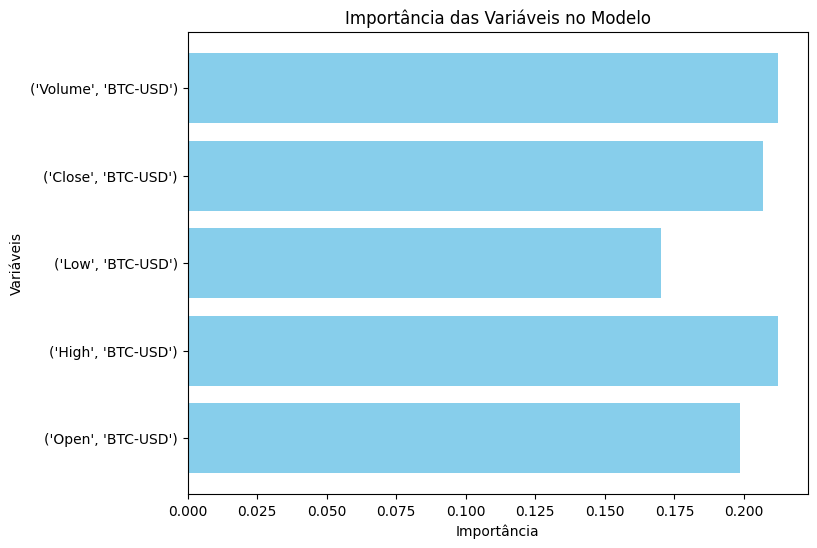

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Coletando dados históricos do Bitcoin
df = yf.download('BTC-USD', period='60d', interval='1d')

# Criando a variável alvo: Se o preço de fechamento do próximo dia será maior (1) ou menor (0)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Removendo valores nulos que surgiram após o shift
df.dropna(inplace=True)

# Selecionando as variáveis preditoras
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de classificação
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Exibindo a importância das variáveis corretamente
importances = model.feature_importances_
# Convertendo a importância das variáveis para um array unidimensional
importances = importances.flatten() if isinstance(importances, np.ndarray) else importances

# Convertendo os nomes das features para uma lista de strings
features = list(map(str, X.columns))

# Gráfico de importância das variáveis
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo')
plt.show()



